#Implemet logistic regression in Python

##Step 1 import dataset iris

In [18]:
from sklearn import datasets

In [19]:
iris = datasets.load_iris()

In [1]:
#iris.data


In [2]:
#iris.target

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

## Calculate cost

In [23]:
import numpy as np


In [24]:
data = iris.data
target = iris.target
type(data)

numpy.ndarray

## scatter plot for the data

In [25]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [26]:
import pandas

In [27]:
from pandas import DataFrame

In [28]:
df = DataFrame(np.random.randn(10, 5))
data_df = DataFrame(data, columns = ['Sepal length','Sepal width','Petal length','Petal width'])
target_df = DataFrame(target, columns=['Species'])

In [29]:
iris_df = data_df
iris_df['Species']=target_df

In [30]:
iris_df[0:10]

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [31]:
plt.figure()

In [32]:
from pandas.tools.plotting import andrews_curves

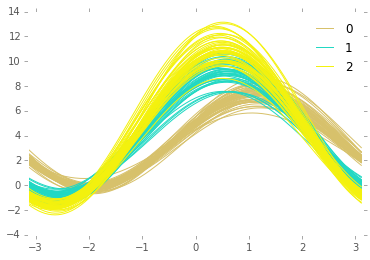

In [33]:
andrews_curves(iris_df, 'Species')

In [37]:
x=iris.data
y=iris.target

In [109]:
from numpy import log,dot,size,exp,expm1,mat,size,ones,bmat

In [228]:
X = mat(iris.data[0:100])
t = mat(iris.target[0:100]).T

n = X.shape[0]
x0 = ones((n,1))
X=bmat('x0 X')
w = mat([-0.0, 0.2, 0.1,0.,1.]).T
#w = ones((n, 1))
y = 1/(exp(-X * w)+1)


In [175]:
def logistic(x):
    return 1/(exp(-x) +1)

### Cost Function
Calculate the cost
w: column matrix with w0
X: matrix wiht x0 = 1
t: column matrix: using 0/1 encoding


In [182]:
def calculate_cost(w, X, t):
    """using vectorized presentation, X:matrix with x0=1, w:matrix with w0, t: using 0/1 encoding matrix"""
    y = logistic(X * w)
    E = - (t.T * log(y) + (1-t).T * log(1-y))
    return E.item(0)

In [229]:
calculate_cost(w, X, t)

91.84788012008777

##Gradient

x is the row of the design matrix X, which is a row vector matrix

In [230]:
logistic(X[0] * w).item(0)

0.8277836082661223

In [615]:
def gradient(x, t, w, ita=0.1):
    """stochastic gradient descent"""
    y = logistic(x * w).item(0)
    
    return ita * (y - t) * x.T
    
    
    
    

In [223]:
gradient(X[0], 1, w, 0.1)


matrix([[ 0.09998103],
        [ 0.50990323],
        [ 0.34993359],
        [ 0.13997344],
        [ 0.01999621]])

In [701]:
def train(X, t, ita=0.1, iternum=1000):
    """train """
    w = mat([-0.0, 0.0, 0.0,0.,0.]).T
    def iter1(X,w):
        n = X.shape[0]
        g = 0
        for i in range(0, n):
            xi = X[i]
            ti = t[i].item(0)
            g += gradient(xi, ti, w, 0.1)
        w = w - g/n
        e = calculate_cost(w, X, t)
        return (w, e)
    for i in range(0, iternum):
        (w, e) = iter1(X,w)
        
    print(e)
        
    

In [703]:
train(X,t, 300)

0.7883702330393618


In [705]:
def score(X, w):
    return logistic(X*w)